# Optimized Network for IMDB Dataset

By optimizing, we mean comparing different networks in term of validation accuracy and validation loss.
The goal, of this Notebook is to know, how changing number of layers and number of parameters affects the validation loss and validation accuracy hugely.

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import imdb

In [2]:
# Fetching dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

In [3]:
X_train.shape, X_test.shape

((25000,), (25000,))

In [3]:
def vectorize(sequences, dimensions = 10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

X_train = vectorize(X_train)
X_test = vectorize(X_test)

y_train = np.asarray(y_train).astype("float32")
y_test = np.asarray(y_test).astype("float32")

In [4]:
# Creating validation sets
val_X = X_train[:10000]
X = X_train[10000:]

val_y = y_train[:10000]
y = y_train[10000:]

### Creating function to compare losses obtained by different networks

In [13]:
def show_loss_comp(history1, history2, epochs = 20):
    loss1 = history1["val_loss"]
    loss2 = history2["val_loss"]
    e = range(1, epochs + 1)
    plt.plot(e, loss1, "r+", label="Network1 loss")
    plt.plot(e, loss2, "bo", label="Network2 loss")
    plt.legend()
    plt.show()
    
def show_acc_comp(history1, history2, epochs = 20):
    loss1 = history1["val_accuracy"]
    loss2 = history2["val_accuracy"]
    e = range(1, epochs + 1)
    plt.plot(e, loss1, "r+", label="Network1 accuracy")
    plt.plot(e, loss2, "bo", label="Network2 accuracy")
    plt.legend()
    plt.show()

## Training with Normal Network

In [5]:
network = models.Sequential()
network.add(layers.Dense(16, activation = "relu", input_shape = (10000,)))
network.add(layers.Dense(16, activation = "relu"))
network.add(layers.Dense(1, activation = "sigmoid"))
network.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [6]:
orig_history = network.fit(X, y, epochs = 20, batch_size = 512, validation_data=(val_X, val_y))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 268us/sample - loss: 0.5330 - accuracy: 0.7777 - val_loss: 0.3977 - val_accuracy: 0.8604
Epoch 2/20
15000/15000 [==============================] - 2s 123us/sample - loss: 0.3111 - accuracy: 0.8988 - val_loss: 0.3019 - val_accuracy: 0.8896
Epoch 3/20
15000/15000 [==============================] - 2s 124us/sample - loss: 0.2264 - accuracy: 0.9255 - val_loss: 0.2774 - val_accuracy: 0.8936
Epoch 4/20
15000/15000 [==============================] - 2s 124us/sample - loss: 0.1761 - accuracy: 0.9412 - val_loss: 0.2736 - val_accuracy: 0.8917
Epoch 5/20
15000/15000 [==============================] - 2s 124us/sample - loss: 0.1405 - accuracy: 0.9562 - val_loss: 0.3127 - val_accuracy: 0.8765
Epoch 6/20
15000/15000 [==============================] - 2s 123us/sample - loss: 0.1182 - accuracy: 0.9633 - val_loss: 0.3021 - val_accuracy: 0.8811
Epoch 7/20
15000/15000 [==========================

## Training on Small Network

In [9]:
network = models.Sequential()
network.add(layers.Dense(4, activation = "relu", input_shape = (10000,)))
network.add(layers.Dense(4, activation = "relu"))
network.add(layers.Dense(1, activation = "sigmoid"))
network.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [10]:
history_1 = network.fit(X, y, epochs = 20, batch_size = 512, validation_data = (val_X, val_y))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 105us/sample - loss: 0.6018 - accuracy: 0.7355 - val_loss: 0.5372 - val_accuracy: 0.8520
Epoch 2/20
15000/15000 [==============================] - 1s 74us/sample - loss: 0.4750 - accuracy: 0.8703 - val_loss: 0.4530 - val_accuracy: 0.8628
Epoch 3/20
15000/15000 [==============================] - 1s 79us/sample - loss: 0.3932 - accuracy: 0.8981 - val_loss: 0.3941 - val_accuracy: 0.8797
Epoch 4/20
15000/15000 [==============================] - 1s 78us/sample - loss: 0.3312 - accuracy: 0.9119 - val_loss: 0.3525 - val_accuracy: 0.8842
Epoch 5/20
15000/15000 [==============================] - 1s 75us/sample - loss: 0.2848 - accuracy: 0.9235 - val_loss: 0.3280 - val_accuracy: 0.8854
Epoch 6/20
15000/15000 [==============================] - 1s 72us/sample - loss: 0.2487 - accuracy: 0.9319 - val_loss: 0.3045 - val_accuracy: 0.8902
Epoch 7/20
15000/15000 [==============================]

### Comparing of loss between original network and a smaller network

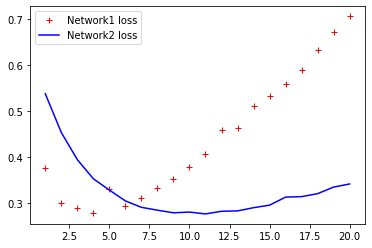

In [11]:
show_loss_comp(orig_history.history, history_1.history)

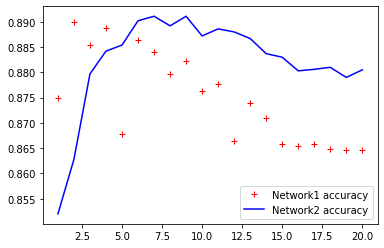

In [12]:
show_acc_comp(orig_history.history, history_1.history)

## Training with Bigger Network

In [13]:
network = models.Sequential()
network.add(layers.Dense(512, activation = "relu", input_shape = (10000,)))
network.add(layers.Dense(512, activation = "relu"))
network.add(layers.Dense(1, activation = "sigmoid"))
network.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [14]:
history_2 = network.fit(X, y, epochs = 20, batch_size = 512, validation_data = (val_X, val_y))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 286us/sample - loss: 0.5615 - accuracy: 0.7493 - val_loss: 0.3020 - val_accuracy: 0.8821
Epoch 2/20
15000/15000 [==============================] - 4s 275us/sample - loss: 0.2497 - accuracy: 0.9045 - val_loss: 0.2937 - val_accuracy: 0.8865
Epoch 3/20
15000/15000 [==============================] - 4s 277us/sample - loss: 0.1609 - accuracy: 0.9369 - val_loss: 0.2861 - val_accuracy: 0.8928
Epoch 4/20
15000/15000 [==============================] - 4s 283us/sample - loss: 0.0717 - accuracy: 0.9744 - val_loss: 0.4053 - val_accuracy: 0.8511
Epoch 5/20
15000/15000 [==============================] - 4s 286us/sample - loss: 0.0199 - accuracy: 0.9953 - val_loss: 1.8899 - val_accuracy: 0.6641
Epoch 6/20
15000/15000 [==============================] - 4s 290us/sample - loss: 0.0477 - accuracy: 0.9867 - val_loss: 0.4920 - val_accuracy: 0.8876
Epoch 7/20
15000/15000 [==========================

## Comparing loss between original network and bigger network

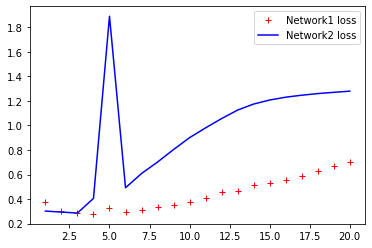

In [16]:
show_loss_comp(orig_history.history, history_2.history)

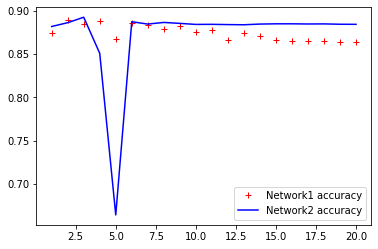

In [18]:
show_acc_comp(orig_history.history, history_2.history)

## Training with Regularized Network

In [8]:
from tensorflow.keras import regularizers

network = models.Sequential()
network.add(layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001), input_shape = (10000,)))
network.add(layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)))
network.add(layers.Dense(1, activation = "sigmoid"))
network.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [9]:
history_reg = network.fit(X, y, epochs = 20, batch_size = 512, validation_data = (val_X, val_y))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 241us/sample - loss: 0.5986 - accuracy: 0.7650 - val_loss: 0.4696 - val_accuracy: 0.8347
Epoch 2/20
15000/15000 [==============================] - 2s 124us/sample - loss: 0.3773 - accuracy: 0.8936 - val_loss: 0.3878 - val_accuracy: 0.8614
Epoch 3/20
15000/15000 [==============================] - 2s 124us/sample - loss: 0.2946 - accuracy: 0.9180 - val_loss: 0.3396 - val_accuracy: 0.8859
Epoch 4/20
15000/15000 [==============================] - 2s 125us/sample - loss: 0.2533 - accuracy: 0.9342 - val_loss: 0.3466 - val_accuracy: 0.8813
Epoch 5/20
15000/15000 [==============================] - 2s 125us/sample - loss: 0.2365 - accuracy: 0.9379 - val_loss: 0.3312 - val_accuracy: 0.8864
Epoch 6/20
15000/15000 [==============================] - 2s 126us/sample - loss: 0.2175 - accuracy: 0.9479 - val_loss: 0.3645 - val_accuracy: 0.8752
Epoch 7/20
15000/15000 [==========================

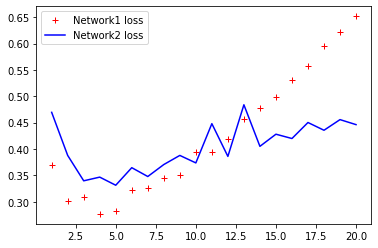

In [12]:
show_loss_comp(orig_history.history, history_reg.history)

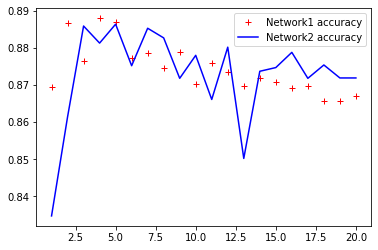

In [13]:
show_acc_comp(orig_history.history, history_reg.history)

## Adding a Dropout Layer

A Dropout layer, randomly sets a fraction of output values to zero.
For example: OUTPUT_VALUES: [0.3, 0.8, 0.1, 0.11, 0.7] After dropout we get, OUTPUT_VALUES: [0, 0.8, 0.1, 0, 0.7].
We can see that, Dropout layer, set values to 0 at random.

In [8]:
# Example showing effects of a dropout layer

# A random output values of layer
layer_output = np.random.randn(3, 3);
layer_output

array([[ 0.88059084,  0.69589104, -1.27667864],
       [-0.01391513, -0.33681285,  0.45626581],
       [ 1.66698079, -0.88623335, -0.43082423]])

In [9]:
# Operating a dropout on layer_output
layer_output *= np.random.randint(0, 2, size=layer_output.shape)

In [10]:
# After operation by a dropout layer
layer_output

array([[ 0.        ,  0.        , -1.27667864],
       [-0.01391513, -0.        ,  0.        ],
       [ 1.66698079, -0.88623335, -0.43082423]])

## Adding a dropout layer in IMDB Network

In [11]:
network = models.Sequential()
network.add(layers.Dense(16, activation = "relu", input_shape = (10000,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(16, activation = "relu"))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(1, activation = "sigmoid"))
network.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [12]:
history_drop = network.fit(X, y, epochs = 20, batch_size = 512, validation_data = (val_X, val_y))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 204us/sample - loss: 0.6364 - accuracy: 0.6289 - val_loss: 0.5328 - val_accuracy: 0.8482
Epoch 2/20
15000/15000 [==============================] - 2s 127us/sample - loss: 0.5131 - accuracy: 0.7588 - val_loss: 0.4135 - val_accuracy: 0.8709
Epoch 3/20
15000/15000 [==============================] - 2s 126us/sample - loss: 0.4284 - accuracy: 0.8221 - val_loss: 0.3407 - val_accuracy: 0.8783
Epoch 4/20
15000/15000 [==============================] - 2s 126us/sample - loss: 0.3582 - accuracy: 0.8611 - val_loss: 0.2970 - val_accuracy: 0.8870
Epoch 5/20
15000/15000 [==============================] - 2s 127us/sample - loss: 0.3095 - accuracy: 0.8857 - val_loss: 0.2818 - val_accuracy: 0.8896
Epoch 6/20
15000/15000 [==============================] - 2s 124us/sample - loss: 0.2723 - accuracy: 0.9022 - val_loss: 0.2758 - val_accuracy: 0.8913
Epoch 7/20
15000/15000 [==========================

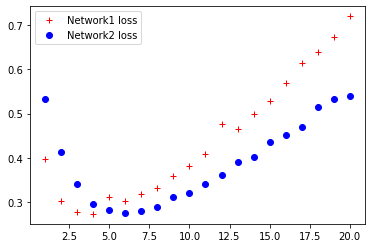

In [14]:
show_loss_comp(orig_history.history, history_drop.history)

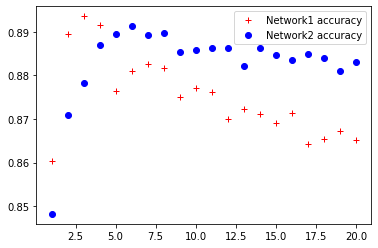

In [15]:
show_acc_comp(orig_history.history, history_drop.history)